# Lab 1 - Concept of a Cell and its Coverage
<p style='text-align: justify;'> This lab consists of the very basic concepts in the cellular mobile networks covering the design, deployment and coverage patterns of cells. The cells form the basis of a cellular radio network with efficiently planned coverage regions with an aim to cover the pre-determined area and provisioning of optimal performance objectives to cellular users. In simpler words, the relative location of a cellular user with respect to the base station should impact as little as possible on the level of service it expects and receives from the network provider. To this end, we intend to cover the following concepts in this lab:</p>

- Cellular Regions (Center, Edge, Out of Coverage)
- Cellular Coverage Patterns (Sectors)
- Associated channel, propagation and losses (SINR)

The scope of this lab is roughly related to <strong>Section 1.7.2</strong> (Page. 26) in the textbook <a href="#References">[1]</a>. However, knowledge about GPRS is required for different tasks in this lab.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='part1'>Part 1: Getting Used to a Cellular Environment </a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## <a id='1-intro'>1. Introduction </a>

<p style='text-align: justify;'> The concept of a cell can simply be described as the bounded region around the signal transmitter (base station) where the communication is possible for the connected users with the cellular network infrastructure via radio links. There can be different coverage patterns for a cell however, a directed coverage consisting of multiple sectors is the most common model for maximizing the reach and availability of access signal for users across the coverage area. The sectored coverage model with directional access and non-sectored omni directional model with an equal coverage in all directions is presented in <b><a id='fig1'>Figure. 1</a>(a)</b> and <b>(b)</b> respectively.<br>
Moreover, users are placed in different locations and relative distances to the transmitting base station. This will have an impact on the received signal power at the user devices depending on the relative distance. Intuitively, the further the user is from the base station, the weaker the signal will get upon its reception. The signal as depicted in <a id='fig1'>Figure. 1</a> shows a stronger strength for warmer colors (yellowish red) and weaker strength for colder colors (blueish purple). In this lab, we intend to explore this behavior by changing the placement of users with respect to the base station.  </p>

| |
|---|
| ![cmap.png](Figures/cmap.png) |

<a id = 'fig1'><p style="text-align: center;"><b>Figure. 1: Radio coverage behavior (a) 3-Sector Cell, (b) 1-Sector Cell.</b></p></a>
<br>

### <a id='1.1-cellularregions'>1.1 Cellular Regions</a>
#### 1.1.1 Cell Center
<p style='text-align: justify;'>This region of the cell, immediately next to the transmitter, is the center region with the strongest coverage as shown in <a id='fig1'>Figure. 1</a>. The users in this region are expected to receive best possible service in terms of received signal strength, call quality and maximum achievable data rate.</p>

#### 1.1.2 Cell Edge
<p style='text-align: justify;'>This region of the cell is immediately next to the coverage boundary but still gets sufficient coverage from the transmitter at base station. It receives less signal strength in comparison to the center region of the cell as shown in <a id='fig1'>Figure. 1</a>. The users in this region are expected to receive average (or below average) service in terms of received signal strength, call quality and maximum achievable data rate.</p>

#### 1.1.3 No Coverage
<p style='text-align: justify;'>This region in the cell is where no service is expected to be delivered and the connection of a user with the base station becomes infeasible due to extremely low signal strength. The coldest regions (blueish purple) are the no-coverage regions as shown in <a id='fig1'>Figure. 1</a>.</p>

### <a id='1.2-cellularparams'>1.2 Cellular Parameter</a>
In this lab, we will consider a set of parameters for evaluating the performance of a cellular environment. The designed tasks intend to explore these parameters and their impact on the performance parameters.

- <b>Transmit Power of Base Station</b>
- <b> Coverage Model</b>


### <a id='1.3-performparams'>1.3 Performance Measurement Parameters</a>
<p style='text-align: justify;'> We will observe 3 parameters to measure the performance of the received signal at the users during the simulation. These are stated below in <a id='tab1'>Table. 1</a> along with their respective ranges for reference.</p> 

<a id = 'tab1'>

| Connectivity | Signal Power (dBm) | Signal Quality (dB) | SINR (dB) |
|--------------|--------------------|---------------------|-----------|
| <code style="background:lime;color:black">Excellent</code>    | <code style="background:lime;color:black">>= -80 </code>            | <code style="background:lime;color:black">>= -10 </code>              | <code style="background:lime;color:black">>= 20 </code>     |
| <code style="background:lightsalmon;color:black">Good</code>          | <code style="background:lightsalmon;color:black">-80 to -90</code>         | <code style="background:lightsalmon;color:black">-10 to -15</code>          | <code style="background:lightsalmon;color:black">13 to 20</code>  |
| <code style="background:coral;color:black">Medium</code>       | <code style="background:coral;color:black">-90 to -100</code>        | <code style="background:coral;color:black">-15 to -20</code>          | <code style="background:coral;color:black">0 to 13</code>   |
| <code style="background:black;color:white">Weak</code>         | <code style="background:black;color:white"><= -100</code>            | <code style="background:black;color:white">< -20</code>               | <code style="background:black;color:white"><= 0</code>      |
<p style="text-align: center;"><b>Table. 1: Reference connectivity state for different ranges. <a href="#References">[2]</b></p> </a>

> <b>Note:</b> The values for these parameters are negative and mathematically -70dBm is considered better than -80dBm.<br>

## <a id='2-exampcellular'>2. Example Cellular Topology</a>
<p style='text-align: justify;'>In this example scenario, we utilize the topology shown in <a id='fig2'>Figure. 2</a> to simulate the cellular network for 3 users within the coverage of a single cell with uniform distribution of signal in all directions. We utilize a distance-dependent signal propagation model in the wireless radio channel to model signal propagation and reception losses for different users. The signal strength received at the user terminals is dependent on the initial transmit power selected at the transmitter installed at the base station.</p> 

| |
|---|
| 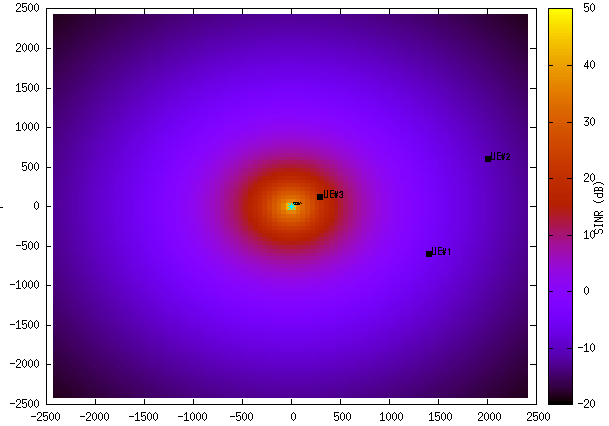 |
<a id = 'fig2'><p style="text-align: center;"><b>Figure. 2: A single transmitter at the cell center (eNB Transmit Power = 40dB). </b></p></a>
<br>

### <a id='s1'>Step 1: Running a simulation with omnidirectional cell</a>
Firstly, we will look at an omnidirectional cell and run some simulations with it. This python script is designed to execute the underlying ns-3 simulation in order to instantiate, simulate and collect results in this jupyter notebook interface. The script requires the following inputs from the user in order to configure the parameters specified in <b> <a id='1.2-cellularparams'>Section 1.2</a></b>. 

- **Sectors** (<u>yes</u> for having sectors & <u>no</u> for having omni directional eNB transmitters)
- **eNB transmit power** (choose a value of 40dBm for this task)

> <b>Note:</b> During first execution of the python script, ns-3 builds its libraries which can take a long time (should not be more than 10mins) based on resource availability. In contrast, for each subsequent run, the process should be fairly quick. 

In [ ]:
# In this part we'll want an omnidirectional cell
%run -i 'Modules/lab1-init.py'

After the successful completion of ns-3 simulation, a series of variables are made available to the notebook to be utilized for evaluation of the obtained results. The results are extracted using <b><a id='s2'>step 2</a></b>. 

### <a id='s2'>Step 2: Querying relevant simulation results</a>
This step involves the search and retrieval of the relevant results as dictated by the parameter variable. The queried results can be displayed using the <b>display(variable_name)</b> command in python.

In [ ]:
params_signalpower = {
    'enablesignalpower': True,
    'enableSectors': sectors,
    'bsTxPower': txpower,
    'runId': runid,
}

params_sinr = {
    'enablesinr': True,
    'enableSectors': sectors,
    'bsTxPower': txpower,
    'runId': runid,
}

result_signalpower = campaign.db.get_complete_results(params=params_signalpower)
result_sinr = campaign1.db.get_complete_results(params=params_sinr)

print("There are %s results in the database\n" % len(list(result_signalpower)))
print("There are %s results in the database\n" % len(list(result_sinr)))

The results will be available in the following variables for further processing after completion of a ns-3 simulation, 
- **result_signalpower** provides information regarding received signal power and signal quality for cellular users. 
- **result_sinr** provides information regarding received signal power and interference experienced by the cellular users. 
- **result_throughput** provides information regarding averaged user throughput in downlink and uplink for cellular users.

In addition, we also have the <b>campaign</b> variables which are from the `lab1-init.py` containing the simulation objects for the ns-3 simulations. We use them here to obtain the results using the simulation objects. 

In [ ]:
display(result_signalpower)

The available variables, as in Lab0, require pre-processing in order to make them presentable in a jupyter notebook. Hence, a python script is designed to perform this task in <b><a id='s3'>Step 3</a></b>. 

### <a id='s3'>Step 3: Pre-processing simulation results</a>
The results obtained from ns-3 require some pre-processing and cleaning in order to perform visualization on the data. This is implemented in the `lab1-dataPre.py` script. The results for the received signal parameters are available in variables after execution of this script (i.e., **res_signalpower** and **res_sinr** for signal quality and sinr respectively).</p>

In [ ]:
%run -i 'Modules/lab1-dataPre.py'
# dataframes for visualizing respective results
# res_signalpower for RSRP and RSRQ
# res_sinr for SINR

# A new set of variables introduced to utilize the results of omni directional simulation for comparison (if required) 
omni_res_signalpower = res_signalpower
omni_res_sinr = res_sinr

It is expected that the data will be cleaner now. This can be verified by displaying samples from the signal power and SINR variables. As shown in Lab0, dataframes provide flexible querying of different data fields. This has been utilized to analyze the some data samples after data cleaning for *user 11*. This approach can be extended for other users as well by extracting their user id from the simulation results. 

In [ ]:
display(res_signalpower.head())
display(res_sinr.head())

### <a id='s4'>Step 4: Visualizing the simulation results</a>
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this with the results variables we extracted in <a id='s3'>Step 3</a>.

In [ ]:
omni_res_signalpower = res_signalpower
omni_res_sinr = res_sinr

sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(40,10))
snsp1 = sns.lineplot(ax=axes[0], data=omni_res_signalpower, x='time', y='sig_power', hue='uid', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp2 = sns.lineplot(ax=axes[1], data=omni_res_signalpower, x='time', y='sig_quality', hue='uid', errorbar=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp3 =  sns.lineplot(ax=axes[2],data=omni_res_sinr, x='time', y='sinr', hue='uid', errorbar=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')

plt.show()

## <span style="color:red"> <a id='task1'>*Task#1: Reviewing the Sample Topology*</a> </span>

### Exercises

#### Q1: Identify the user id and location of the users (User 1,2,3) as being center, edge or out of coverage for the given topology in Figure 2?
> <b>Hint</b>: Use <a id='tab1'>Table 1</a> as reference and refer to the coordinate location of users in <a id='fig1'>Figure 1</a>.

#### Q2: Will there be an impact on the performance of the users in the different cellular regions? Explain with reference to the performance measurements and simulation results?

#### Q3: During network access, authentication is performed for users. Why is there a need to get users authenticated in a cellular network?

#### Q4: Which of the users (User 1,2,3) would not obtain authentication from the cellular network?

---
---
### <span style="color:blue"> Milestone 1 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='part2'>Part 2: Exploring the concept of Sectors in a Cell</a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <span style="color:red"> <a id='task2'>*Task#2: Coverage in a Sectored Cell*</a></span>
<p style='text-align: justify;'>In deployed cellular networks, omni directional (or single sector cell) with uniform coverage across all directions are rarely utilized. The reason for this is the inefficient radiation of power in all directions. Moreover, the cellular user capacity requires sectored planning of the topologies in order to enhance the total number of serviced users. This sector design is achieved through various mechanisms along with the utilization of directional antennas with techniques such as electrical and mechanical tilting to focus radiated signal in a particular direction. A typical coverage comparison of a directional and omni-directional antenna is shown in <a id='fig3'><b>Figure 3</b>.</a></p>

| |
|---|
| 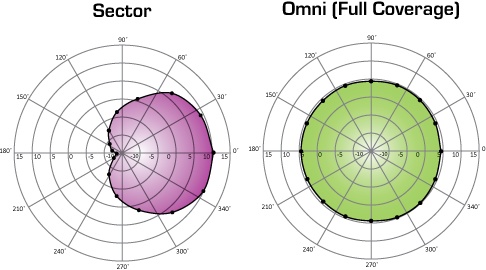 |

<a id = 'fig3'><p style="text-align: center;"><b>Figure. 3: Antenna coverage of a sectored and omni cell.</b></p></a>

In this task, the simulation scenario will focus on a topology as shown in <a id='fig4'><b>Figure 4</b>.</a> with 3-sectors and serving 3-users in one sector. The location for the users has been kept constant in order to provide a baseline comparison between single and multiple sector cells. 

| |
|---|
| 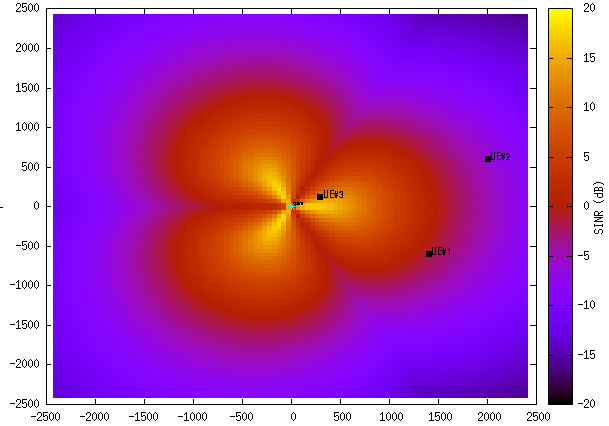 |

<a id = 'fig4'><p style="text-align: center;"><b>Figure. 4: A 3-sector cell (eNB Transmit Power = 40dB).</b></p></a>

The steps for running the simulation are shown as follows:

### <a id='task2-step1'>Step 1: Running a simulation with sectored cells</a>
This step will help run the simulation for sectored cell with directional antennas. As before, the script requires the following inputs from the user in order to configure the parameters specified in  <b> <a id='1.2-cellularparams'>Section 1.2</a></b>:

- **Sectors** (<u>yes</u> for having sectors & <u>no</u> for having omni directional eNB transmitters)
- **eNB transmit power** (choose a value of 40dBm for this task)

> <b>Note:</b> For comparison purposes consider using the same transmisson power as you used before. 

In [ ]:
%run -i 'Modules/lab1-init.py'

After the successful completion of ns-3 simulation, a series of variables are made available to the notebook to be utilized for evaluation of the obtained results. The results are extracted using the step 2. 

### <a id='task2-step2'>Step 2: Querying and pre-processing simulation results</a>
This step combines <a id='step1'>*Step 1*</a> and <a id='step2'>*Step 2*</a> from <a id='part1'>Part 1</a>.

In [ ]:
params_signalpower = {
    'enablesignalpower': True,
    'enableSectors': sectors,
    'bsTxPower': txpower,
    'runId': runid,
}

params_sinr = {
    'enablesinr': True,
    'enableSectors': sectors,
    'bsTxPower': txpower,
    'runId': runid,
}

result_signalpower = campaign.db.get_complete_results(params=params_signalpower)
result_sinr = campaign1.db.get_complete_results(params=params_sinr)

print("There are %s results in the database\n" % len(list(result_signalpower)))
print("There are %s results in the database\n" % len(list(result_sinr)))

%run -i 'Modules/lab1-dataPre.py'
# dataframes for visualizing respective results
# res for RSRP and RSRQ
# res1 for SINR

In [ ]:
display(res_signalpower.head())
display(res_sinr.head())

val=res_signalpower[res_signalpower['uid']== 'user14']

display(val)

In [ ]:
## To get an overview of your results, per user
display(res_signalpower[res_signalpower['uid']== 'user11'].describe())
display(res_signalpower[res_signalpower['uid']== 'user14'].describe())
display(res_signalpower[res_signalpower['uid']== 'user16'].describe())

### <a id='task2-step3'>Step 3: Visualizing the simulation results</a>
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this with the results variables we extracted in <a id='task2-step2'>*Step 2*</a>.

#### Sector 1
The variable names have been adapted in order to differentiate the sector-based measurement results: 
- <b>res_sigpower_sec1</b> provides sig_power and sig_quality results
- <b>res_sinr</b> provides the SINR results (this will only be available from one sector as the users will only be connected to one sector at a time)

**Important Visualization Tip:** 
In a cellular network, each user will probably receive some signal from all the sectors. Hence, the dataframe containing the signal power and signal quality parameters (**res_signalpower**) will have these reported values by the users in each sector. For example, this scenario consists of 3 users and 3 sectors, so a combination of 9 reported signal power and signal quality parameters are made available in the **res_signalpower** dataframe. 

The user data is labeled in the following format available as a key and column in data frame for access: 

- **Format:** <u>**user<span style="color:red"> *x*</span><span style="color:blue"> *y*</span>**</u> ; here **<span style="color:red"> *x*</span>** depicts the **<span style="color:red"> *cell ID*</span>** and **<span style="color:blue"> *y*</span>** is the **<span style="color:blue"> *node ID*</span>** in a particular sector.

- The range of values of **<span style="color:red"> *x*</span>** are in the set [1,2,3...] whereas values of **<span style="color:blue"> *y*</span>** can differ but will still be numeric (this variation in values is due to the connectivity and other aspects in the ns-3 simulator).

To find the actual values, use the following snippet of code:

In [ ]:

df = res_signalpower['uid']
df.drop_duplicates()
print(df.to_string())


Afterwards create the variables for visualizing different signal powers from each sector in the topology. The format of the **uid** will be determined from the observed results. For example, if the observed **uids** are *user11*, *user14*, and *user16*, then the following sample code can be used. Otherwise, an adjustment will be required based on observed values of uids.

In [ ]:
val11=res_signalpower[res_signalpower['uid']== 'user11']
val14=res_signalpower[res_signalpower['uid']== 'user14']
val16=res_signalpower[res_signalpower['uid']== 'user16']

res_signalpower_sec1 = pd.concat([val11, val14, val16])

Hence, after some pandas magic, we are able to extract the output of sector 1 of the site for each of the users. The same can be extended by using different **uid** values for sectors 2 and 3.  

In [ ]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 3, figsize=(40,10))
snsp1 = sns.lineplot(ax=axes[0], data=res_signalpower_sec1, x='time', y='sig_power', hue='uid', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp2 = sns.lineplot(ax=axes[1], data=res_signalpower_sec1, x='time', y='sig_quality', hue='uid', errorbar=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp3 = sns.lineplot(ax=axes[2],data=res_sinr, x='time', y='sinr', hue='uid', errorbar=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')

plt.show()

sns.reset_orig()

#### Sector 2
The variable names have been adapted in order to differentiate the sector-based measurement results: 
- <b>res_sigpower_sec2</b> provide sig_power and sig_quality results
- <b>res_sinr</b> provide the sinr results (this will only be available from one sector as the users will only be connected to one sector at a time)

In [ ]:
val21=res_signalpower[res_signalpower['uid']== 'user21']
val24=res_signalpower[res_signalpower['uid']== 'user24']
val26=res_signalpower[res_signalpower['uid']== 'user26']

res_signalpower_sec2 = pd.concat([val21, val24, val26])

sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 2, figsize=(40,10))
snsp2 = sns.lineplot(ax=axes[0], data=res_signalpower_sec2, x='time', y='sig_power', hue='uid', errorbar=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp2 = sns.lineplot(ax=axes[1], data=res_signalpower_sec2, x='time', y='sig_quality', hue='uid', errorbar=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

plt.show()

sns.reset_orig()

#### Sector 3
The variable names have been adapted in order to differentiate the sector-based measurement results: 
- <b>res_sigpower_sec3</b> provide sig_power and sig_quality results
- <b>res_sinr</b> provide the sinr results (this will only be available from one sector as the users will only be connected to one sector at a time)

In [ ]:
val31=res_signalpower[res_signalpower['uid']== 'user31']
val34=res_signalpower[res_signalpower['uid']== 'user34']
val36=res_signalpower[res_signalpower['uid']== 'user36']

res_signalpower_sec3 = pd.concat([val31, val34, val36])

sns.set(font_scale=1.5)
fig, axes = plt.subplots(1, 2, figsize=(40,10))
snsp3 = sns.lineplot(ax=axes[0], data=res_signalpower_sec3, x='time', y='sig_power', hue='uid', errorbar=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp3 = sns.lineplot(ax=axes[1], data=res_signalpower_sec3, x='time', y='sig_quality', hue='uid', errorbar=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

plt.show()

sns.reset_orig()

### Exercises

#### Q1: Which type of coverage will provide better performance for the users? What is the main reason impacting this difference in performance? 
> Hint: Answer by comparing performance results for omnidirectional and sectored antennas

#### Q2a: What are the potential benefits of having a sectored design as opposed to a omni directional coverage for a cell?

#### Q2b: Is there an impact of transmit power, user service requirements or radio environment in determining the choice of having omnidirectional or sectored antennas?

#### Q3: What is the impact of using similar or different frequencies in different sectors of a cellular site? 

#### Q4: Is user capacity (number of served users) a factor in determining the type of antenna to be utilized in an environment? How is the relation between cell capacity and sectors explained?

---
---
### <span style="color:blue"> Milestone 2 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## <span style="color:red"> <a id='task3'>*Task#3: Impact of Transmit Power on Cell Coverage*</a></span>
There are several methods to control the coverage behavior in a cellular network. These include the physical and electronic adjustment of beamwidth of the antennas (for example <a id='task2'><b>Task#2</b></a> explores the sectors in a cell with an equal beamwidth of 120 degrees). Moreover, the power levels at the time of transmission can be adjusted to increase the experiences SINR and consequently the received signal power by users. However, the power levels are standardized due to safety, compatibility, and battery optimization objectives.<br>
In this task, we will explore this power level parameter in order to change the coverage behavior of the non-sectoral and sectoral designs discussed in <a id='task1'><b>Task#1</b></a> and <a id='task2'><b>Task#2</b></a>. Up until this point we have utilized a transmit power of 40dBm for simulating the topologies. We will use different levels of power within the range <b>15-45dBm</b> (when required) to explore the coverage behavior. We again use the command line arguments to pass the 'transmit power' as a second argument while running the `lab1-init.py`. Utilize the sample code provided in <a id='task1'><b>Task#1</b></a> and <a id='task2'><b>Task#2</b></a> to fulfill the transmit power analysis. Add any code cells below this cell to show the required code to reproduce the simulation results. 

### Exercises

#### Q1a: (a) What is the observed impact of transmit power on the coverage of the sectored and non-sectored cell on the experienced signal level? (Reference: <a id='tab1'>Table. 1</a>)? 

#### Q1b: Which of the observed performance measurement parameters best represent the change caused due to transmit power for the users? 

#### Q2a: How can the transmit power be chosen in an energy efficient manner for the omnidirectional and sectored cells? 
> Note: Consider the scenarios in <a id='task1'><b>Task#1</b></a> and <a id='task2'><b>Task#2</b></a> to justify the utilized transmit power values.

#### Q2b: Is the comparison in <a id='task1'><b>Task#1</b></a> and <a id='task2'><b>Task#2</b></a> fair in terms of transmit power? Explain your reasoning? 


#### Q2c: How can the transmit power allocation values be changed in order to realize the full potential of sectored cells? Is there any other parameter impacting this choice?

#### Q3a: Modulation and Coding schemes (MCS) are utilized to for different levels of service in terms of provisioned maximum user rates. (a) What determines the selection of a MCS for a user in a cell?

#### Q3b: Is there a relationship between received signal quality (power) on the selection of MCS?

---
---
### <span style="color:blue"> Milestone 3 </span>

At the end, **call a TA** to make sure everything went as expected.

---
---

# References

[1] "From GSM to LTE-Advanced Pro and 5G, An introduction to Mobile Networks and Mobile Broadband", Martin Sauter, 4th Edition, 2021

[2] " LTE; Evolved Universal Terrestrial Radio Access (E-UTRA); Requirements for support of radio resource management ", LTE Tutorials. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2420 (Accessed: 12-01-2023)


---
---